# Illustrations of differences between lagrangian and eulerian perspectives

$u(x,t) = U[1+ae^{-x^2/L^2}sin(2\pi t/T)]$

In [1]:
import numpy as np
from scipy.integrate import odeint

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation, rc
#from IPython.display import HTML


# create synthetic data solver


In [2]:
compute_u = (lambda x, t, U, alpha, L, T: 
             U*(1+alpha*np.exp(-x**2/L**2)*np.sin(2*np.pi*t/T))
            )

def u_wrapper(x, t, U, alpha, L, T):
    dxdt = [compute_u(x[0], t, U, alpha, L, T)]
    return dxdt

def get_trajectory(alpha, L, T, U=1, x0=-5, t=None):
    s = {'U': U, 'alpha': alpha, 'L': L, 'T': T}    
    if t is None:
        t = np.arange(0, 10, .05)
    x = odeint(u_wrapper, x0, t, args=(U, 1., 1., 1.)).squeeze()
    u = compute_u(x, t, U, alpha, L, T)
    u_at_x0 = compute_u(0, t, U, alpha, L, T)
    s.update(**{'t': t, 'x': x, 'u': u, 'u_at_x0': u_at_x0})
    return s
    
alpha, L, T = 1., 1., 0.5

s = get_trajectory(alpha, L, T)

print('UT/L = {}'.format(s['U']*s['T']/s['L']))

UT/L = 0.5


Text(0.5, 1.0, 'u')

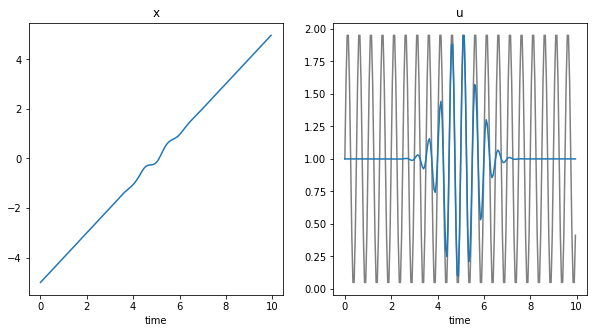

In [3]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(s['t'],s['x'])
ax[0].set_xlabel('time')
ax[0].set_title('x')
ax[1].plot(s['t'], s['u_at_x0'], color='0.5')
ax[1].plot(s['t'],s['u'])
ax[1].set_xlabel('time')
ax[1].set_title('u')

In [5]:
x = np.arange(-5, 5,.1)
u = compute_u(s['x'],s['t'],s['U'],alpha,L,T)

(0, 2)

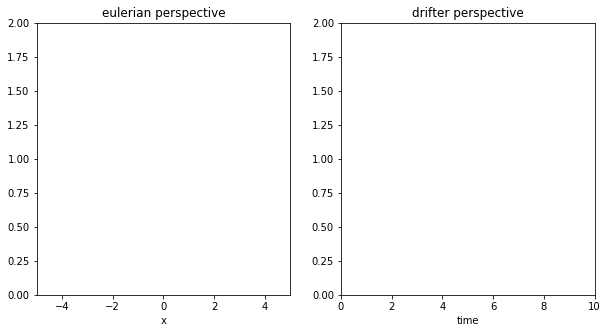

In [4]:
fig, axs = plt.subplots(1,2, figsize=(10,5))

msize=10
color_dr = 'orange'

# eulerian
ax=axs[0]
l0, = ax.plot([], [], color=color_dr, lw=2)
p00, = ax.plot([], [], marker='o', markersize=msize, color=color_dr)
p01, = ax.plot([], [], marker='o', markersize=msize, color='k')
ax.set_xlabel('x')
ax.set_title('eulerian perspective')
ax.set_xlim(-5, 5)
ax.set_ylim(0, 2)

# float perspective
ax=axs[1]
l1, = ax.plot([],[], color=color_dr, lw=2)
l11, = ax.plot([],[], color='0.7', lw=1)
p10, = ax.plot([], [], marker='o', markersize=msize, color=color_dr)
p11, = ax.plot([], [], marker='o', markersize=msize, color='k')
ax.set_xlabel('time')
ax.set_title('drifter perspective')
ax.set_xlim(0, 10)
ax.set_ylim(0, 2)


In [6]:
def init():
    l0.set_data([], [])
    p00.set_data([], [])
    p01.set_data([], [])
    l1.set_data([], [])
    l11.set_data([], [])
    p10.set_data([], [])
    p11.set_data([], [])
    return (l0,l1,l11,p00,p01,p10,p11)

In [5]:
x = np.arange(-5, 5,.1)

def animate(i, s):
    U, alpha, L, T = s['U'], s['alpha'], s['L'], s['T']
    t = s['t'][i]
    u = compute_u(x, t, U, alpha, L, T)
    #
    l0.set_data(x, u)
    p00.set_data(s['x'][i], s['u'][i])
    p01.set_data(0., s['u_at_x0'][i])
    #
    l1.set_data(s['t'][:i], s['u'][:i])
    l11.set_data(s['t'][:i], s['u_at_x0'][:i])
    p10.set_data(s['t'][i], s['u'][i])
    p11.set_data(s['t'][i], s['u_at_x0'][i])
    return (l0, l1, p00, p01, p10, p11)

In [7]:
def get_anim(s):
     return animation.FuncAnimation(fig, 
                                    animate, 
                                    init_func=init,
                                    fargs=(s,),
                                    frames=s['t'].size,
                                    interval=100, 
                                    blit=True)

In [71]:
s = get_trajectory(alpha, L, T)
anim = get_anim(s)
# requires ffmpeg to be installed:  conda install ffmpeg
anim.save('synthetic_drifter_fast_L1_T05.mp4', writer='ffmpeg')

In [63]:
s = get_trajectory(alpha, L*2, T*40)
anim = get_anim(s)
anim.save('synthetic_drifter_slow_L2_T20.mp4', writer='ffmpeg')

In [7]:
animation.FuncAnimation?


In [39]:
X,tt = np.meshgrid(s['x'],s['t'])

In [41]:
uu = compute_u(X,tt,1,1,1,0.5)

Text(0, 0.5, 'x')

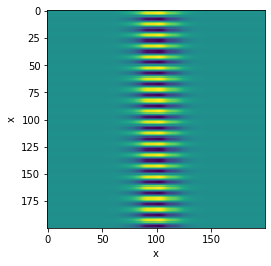

In [54]:
plt.imshow(uu)
plt.xlabel('x');plt.ylabel('x')

In [15]:
def f(x,t,T,L):
    return np.cos(2*np.pi*T*t)*np.sin(2*np.pi*L*x)

In [17]:
compute_uw = (lambda x, t, U, alpha, L, T: 
             U*(1+alpha*np.cos(2*np.pi*L*x)*np.sin(2*np.pi*t/T))
            )

In [18]:
def uw_wrapper(x, t, U, alpha, L, T):
    dxdt = [compute_uw(x[0], t, U, alpha, L, T)]
    return dxdt

def get_trajectoryw(alpha, L, T, U=1, x0=-5, t=None):
    s = {'U': U, 'alpha': alpha, 'L': L, 'T': T}    
    if t is None:
        t = np.arange(0, 10, .05)
    x = odeint(uw_wrapper, x0, t, args=(U, 1., 1., 1.)).squeeze()
    u = compute_uw(x, t, U, alpha, L, T)
    u_at_x0 = compute_uw(0, t, U, alpha, L, T)
    s.update(**{'t': t, 'x': x, 'u': u, 'u_at_x0': u_at_x0})
    return s
    
alpha, L, T = 1., 1., 0.5

sw = get_trajectoryw(alpha, L, T)

print('UT/L = {}'.format(sw['U']*sw['T']/sw['L']))

UT/L = 0.5


In [20]:
def animatew(i, s):
    U, alpha, L, T = s['U'], s['alpha'], s['L'], s['T']
    t = s['t'][i]
    u = compute_uw(x, t, U, alpha, L, T)
    #
    l0.set_data(x, u)
    p00.set_data(s['x'][i], s['u'][i])
    p01.set_data(0., s['u_at_x0'][i])
    #
    l1.set_data(s['t'][:i], s['u'][:i])
    l11.set_data(s['t'][:i], s['u_at_x0'][:i])
    p10.set_data(s['t'][i], s['u'][i])
    p11.set_data(s['t'][i], s['u_at_x0'][i])
    return (l0, l1, p00, p01, p10, p11)

In [21]:
def get_anim(s):
     return animation.FuncAnimation(fig, 
                                    animatew, 
                                    init_func=init,
                                    fargs=(s,),
                                    frames=s['t'].size,
                                    interval=100, 
                                    blit=True)

In [23]:
anim = get_anim(sw)
anim.save('synthetic_drifter_fast_test.mp4', writer='ffmpeg')

In [24]:
sw = get_trajectoryw(alpha, L, T*40)
anim = get_anim(sw)
anim.save('synthetic_drifter_slow_test.mp4', writer='ffmpeg')